In [2]:
from cds_data_fetch import *
import pandas as pd
from pandas.tseries.offsets import MonthEnd, YearEnd

import numpy as np
import wrds

import config
from pathlib import Path
import cds_processing
import plot_interest_rates
from plot_interest_rates import plot_interest_rates
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import cds_processing
from cds_processing import calc_cds_monthly
import plot_cds
from plot_cds import cds_spread_plot
import calc_cds_returns
from calc_cds_returns import calc_cds_return 
from calc_cds_returns import calc_difference
from calc_cds_returns import *


### Interest rates

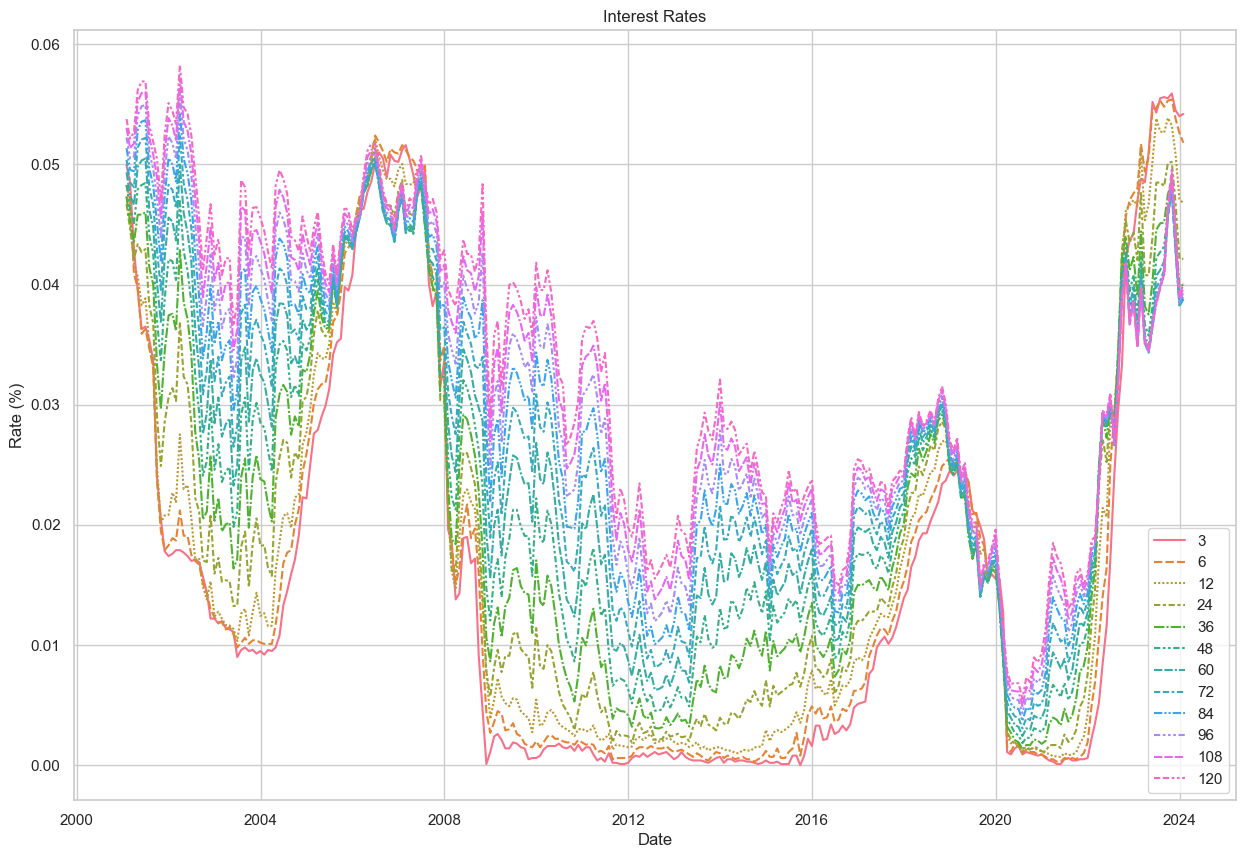

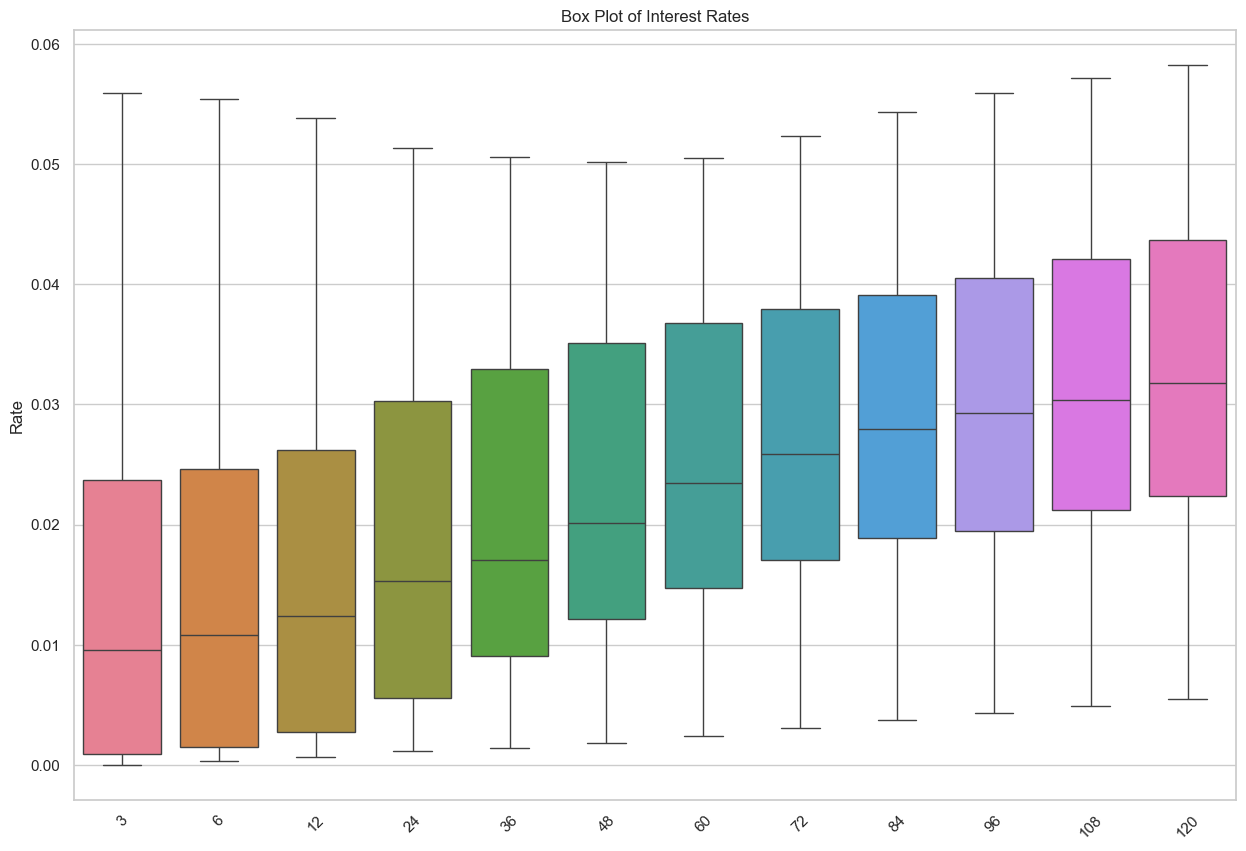

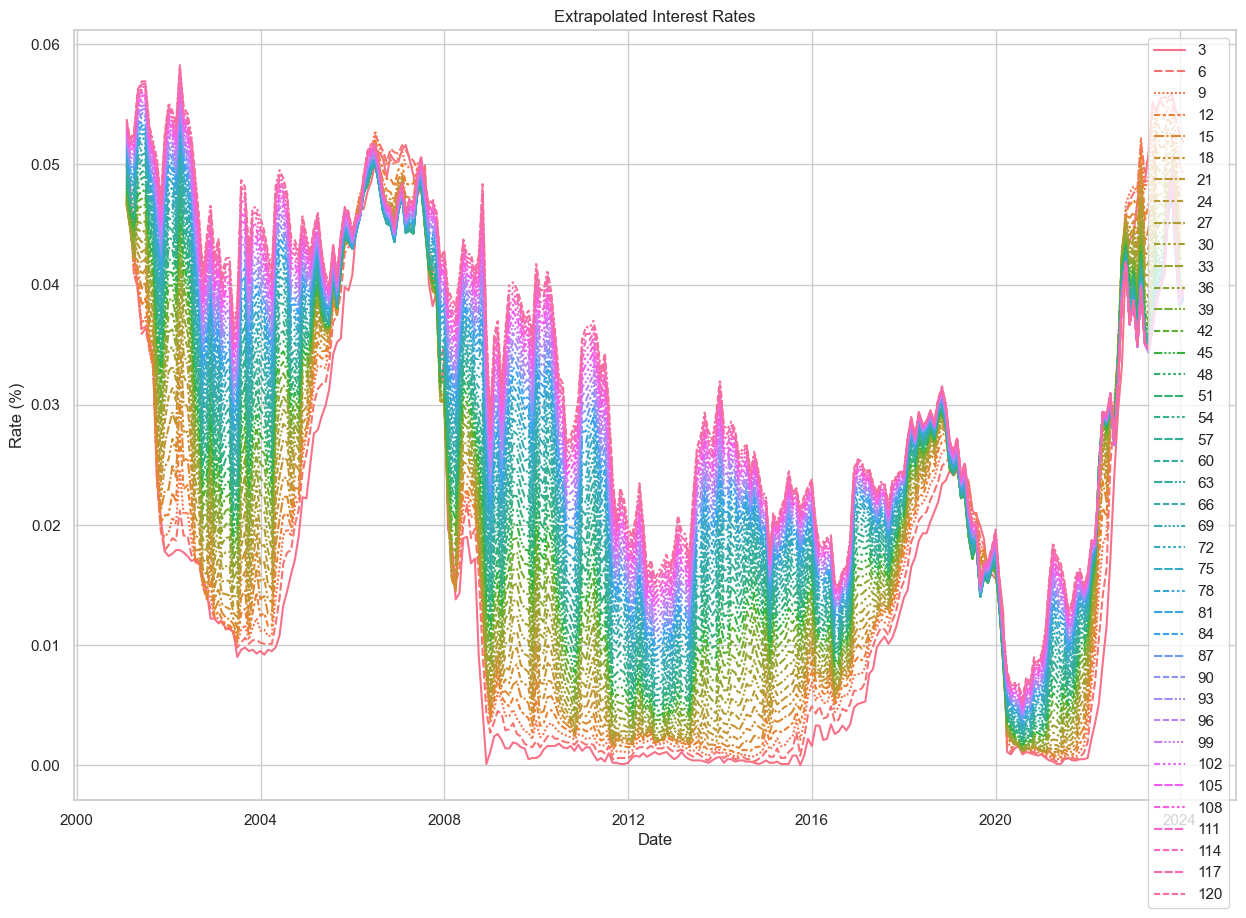

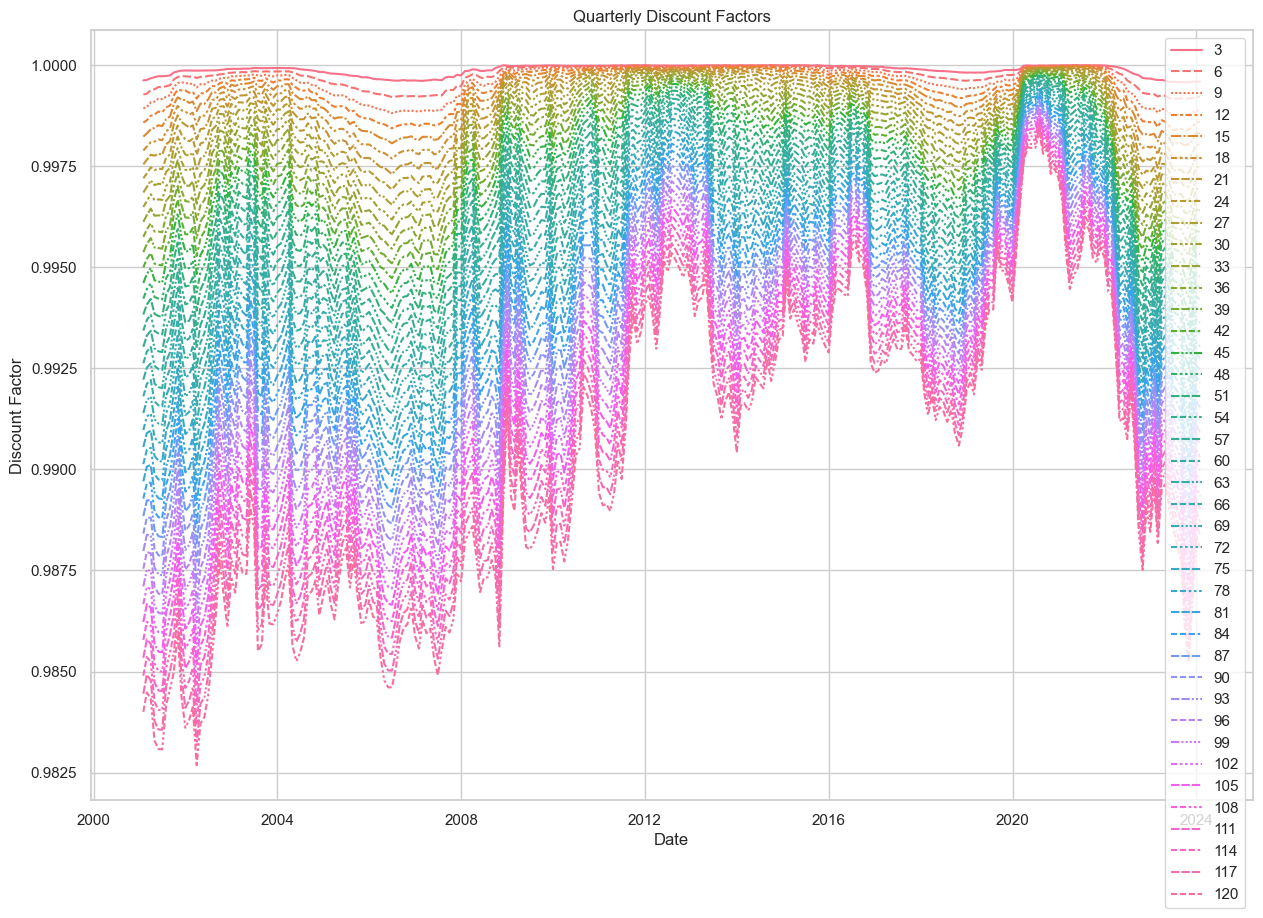

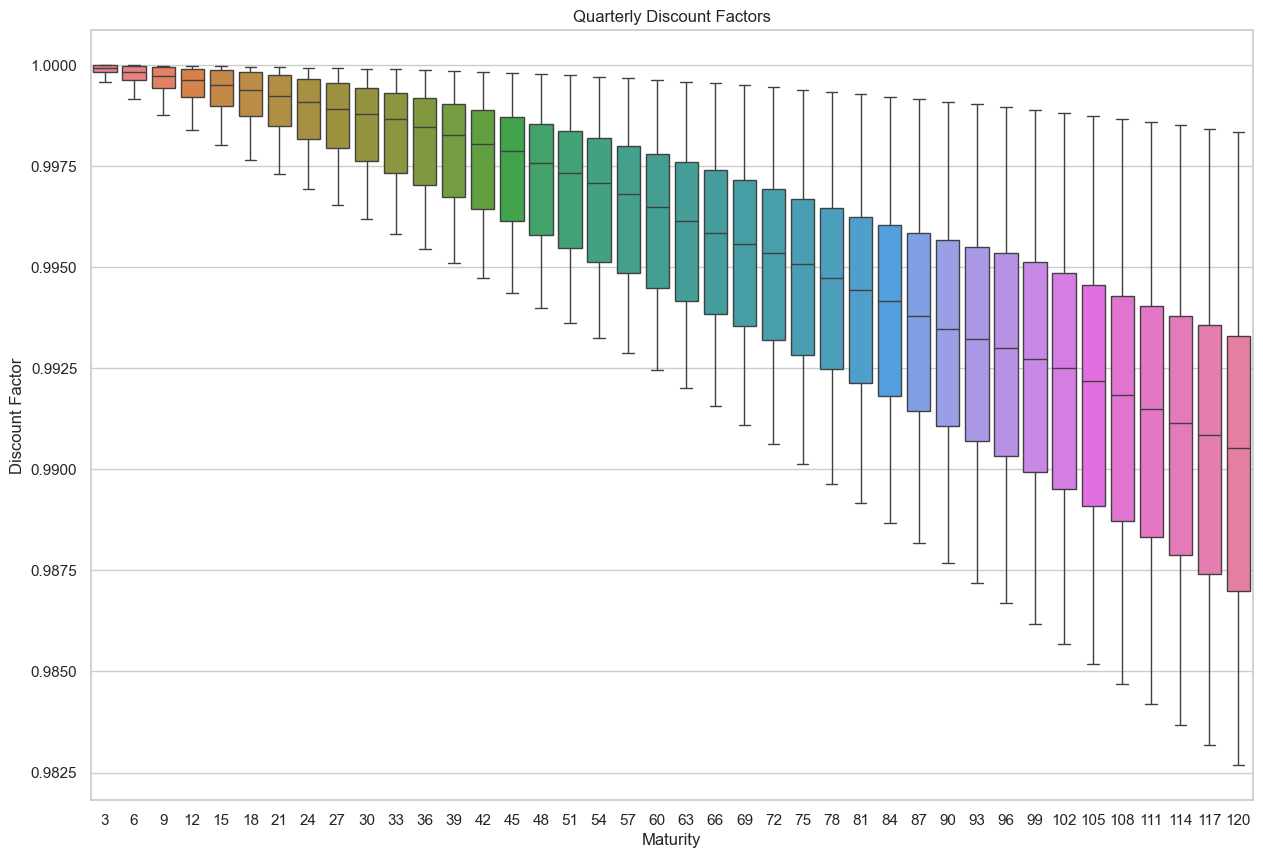

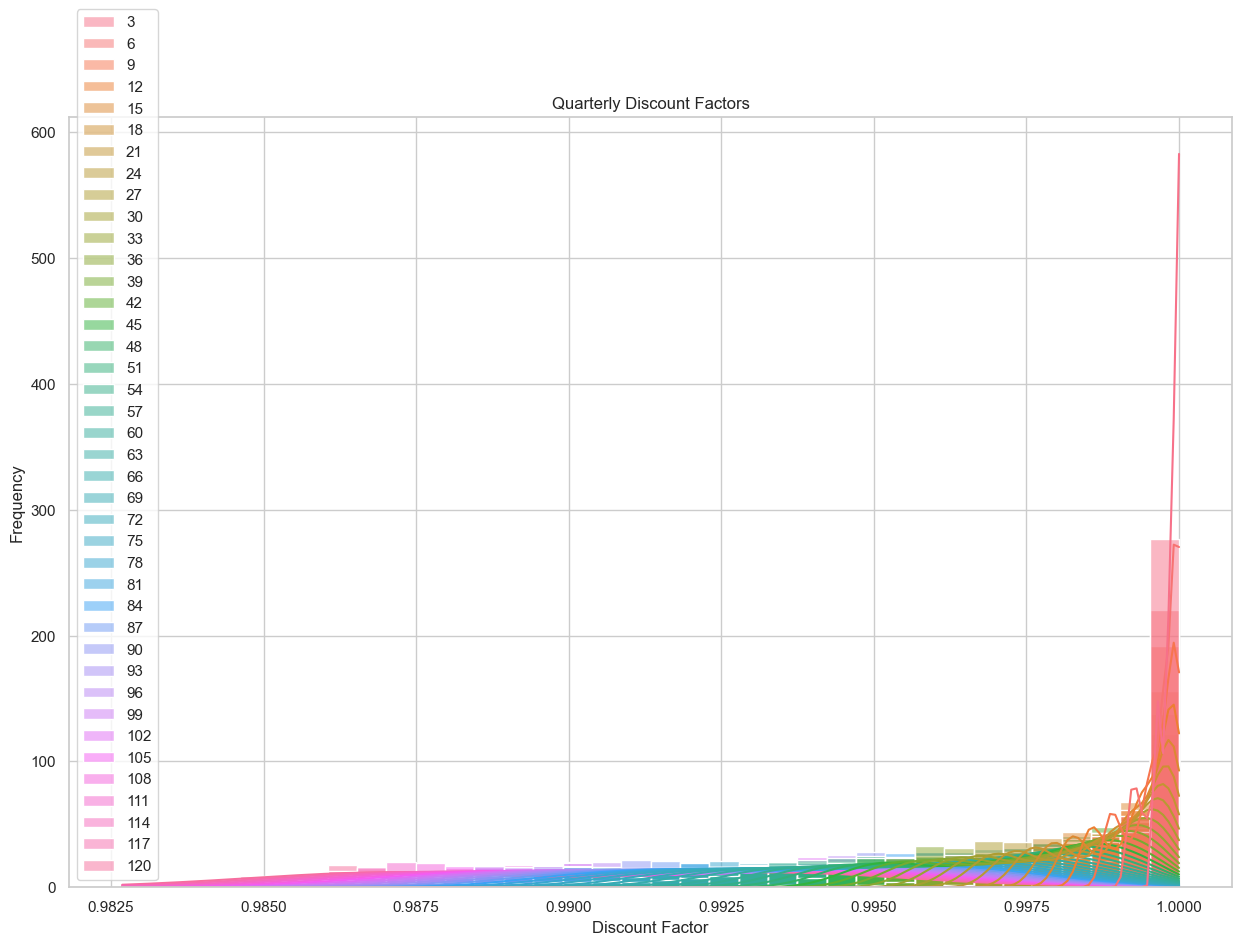

              3           6           9           12          15          18   \
count  277.000000  277.000000  277.000000  277.000000  277.000000  277.000000   
mean     0.999884    0.999753    0.999615    0.999477    0.999332    0.999180   
std      0.000129    0.000260    0.000384    0.000497    0.000606    0.000715   
min      0.999581    0.999170    0.998770    0.998386    0.998018    0.997666   
25%      0.999822    0.999631    0.999432    0.999214    0.998988    0.998752   
50%      0.999928    0.999838    0.999741    0.999628    0.999517    0.999382   
75%      0.999993    0.999978    0.999952    0.999917    0.999873    0.999823   
max      1.000000    0.999996    0.999989    0.999980    0.999969    0.999956   

              21          24          27          30   ...         93   \
count  277.000000  277.000000  277.000000  277.000000  ...  277.000000   
mean     0.999020    0.998851    0.998674    0.998489  ...    0.993098   
std      0.000823    0.000928    0.001029    0.0

In [3]:
start_date = '2001-01-02'
end_date = '2024-01-31'
plot_interest_rates(start_date=start_date, end_date=end_date)

### Credit default swaps (CDS) spread

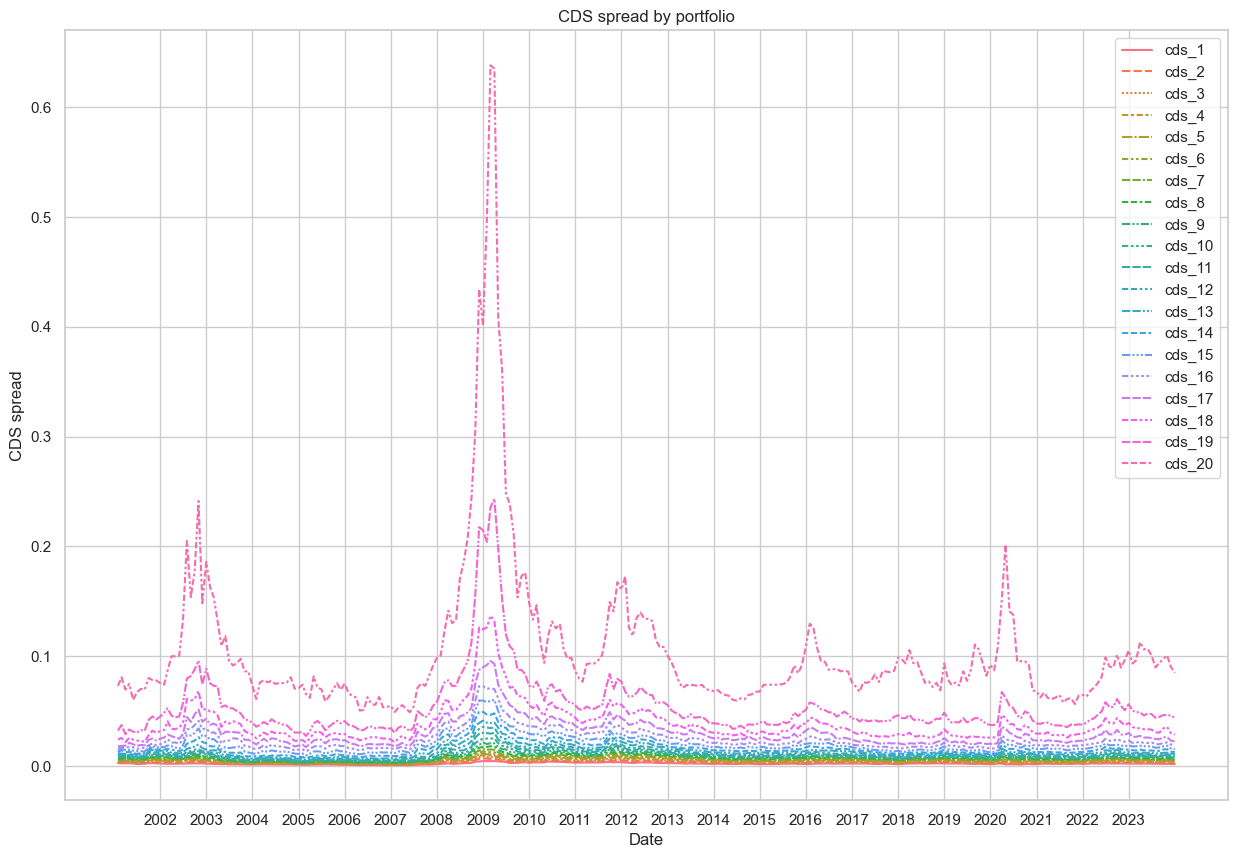

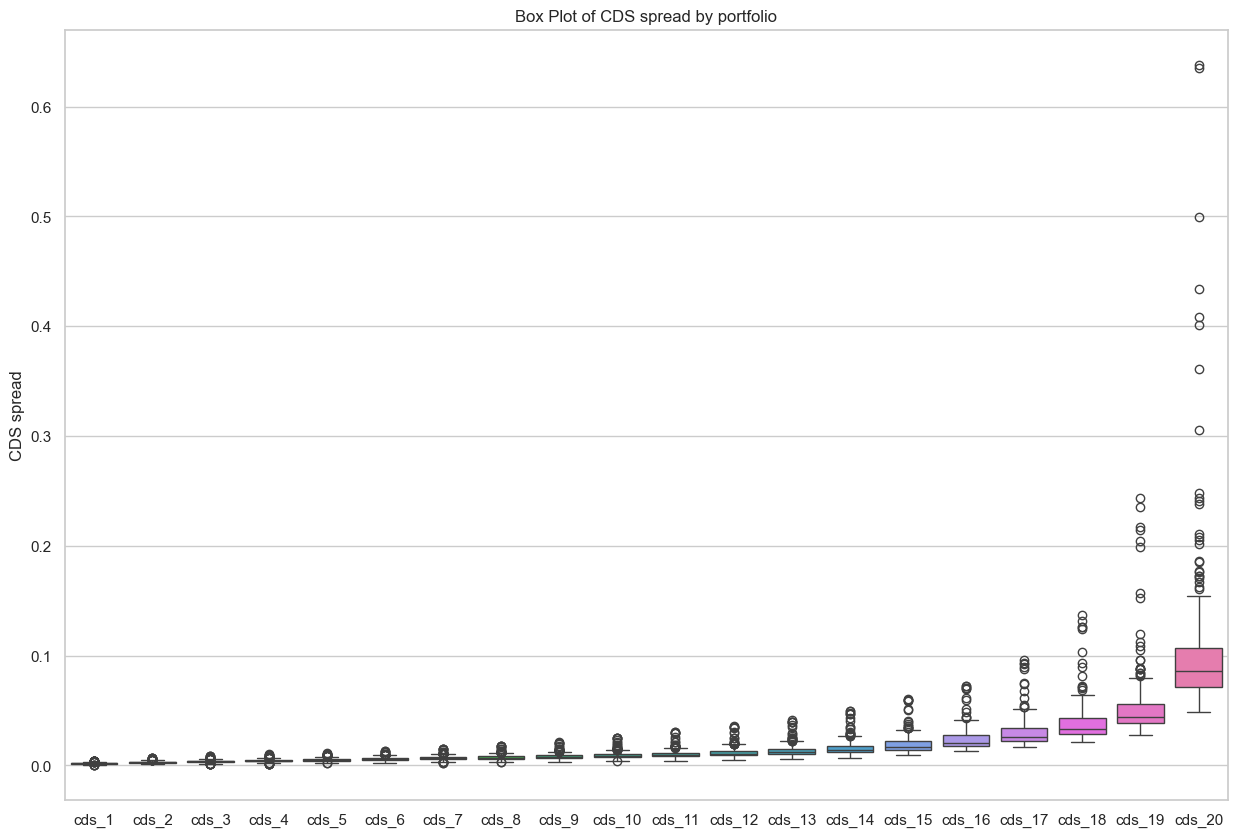

            cds_1       cds_2       cds_3       cds_4       cds_5       cds_6  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.002196    0.003099    0.003773    0.004429    0.005129    0.005838   
std      0.000768    0.001051    0.001275    0.001505    0.001764    0.002043   
min      0.000734    0.001067    0.001341    0.001622    0.001917    0.002258   
25%      0.001771    0.002524    0.003180    0.003756    0.004293    0.004879   
50%      0.002139    0.003002    0.003645    0.004288    0.004994    0.005670   
75%      0.002441    0.003505    0.004252    0.005003    0.005855    0.006649   
max      0.004500    0.006983    0.008767    0.009995    0.011750    0.013398   

            cds_7       cds_8       cds_9      cds_10      cds_11      cds_12  \
count  276.000000  276.000000  276.000000  276.000000  276.000000  276.000000   
mean     0.006592    0.007403    0.008270    0.009241    0.010376    0.011801   
std      0.002332    0.0027

In [4]:
cds_spread_plot(start_date=start_date, end_date=end_date)

# CDS returns estimation

In [5]:
start_date = '2001-01-02'
end_date = '2012-12-31'
returns_mean_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='mean')
returns_median_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='median')
returns_weighted_2012 =calc_cds_return(start_date=start_date, end_date=end_date,Method ='weighted')

In [6]:
start_date2 = '2013-01-02'
end_date2 = '2024-01-31'
returns_mean_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='mean')
returns_median_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='median')
returns_weighted_2024 =calc_cds_return(start_date=start_date2, end_date=end_date2,Method ='weighted')

In [26]:
real_returns = process_real_cds_return()
real_returns, returns_mean_2012 , diff_mean = calc_difference(returns_mean_2012, real_returns)
real_returns, returns_median_2012 , diff_median = calc_difference(returns_median_2012, real_returns)
real_returns, returns_weighted_2012 , diff_weighted = calc_difference(returns_weighted_2012, real_returns)

In [28]:
def plot_cds_returns_mean(start_date, end_date,Method='mean'):
    data = calc_cds_return(start_date, end_date,Method='mean')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - mean method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()

def plot_cds_returns_median(start_date, end_date,Method='median'):
    data = calc_cds_return(start_date, end_date,Method='median')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - median method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()

def plot_cds_returns_weighted(start_date, end_date,Method='weighted'):
    data = calc_cds_return(start_date, end_date,Method='weighted')
    if data is None:
        print("No data available for the given date range.")
        return

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data)
    plt.title("Box Plot of CDS returns - weighted method")
    plt.ylabel("Return (%)")
    plt.xticks(rotation=45)
    plt.show()


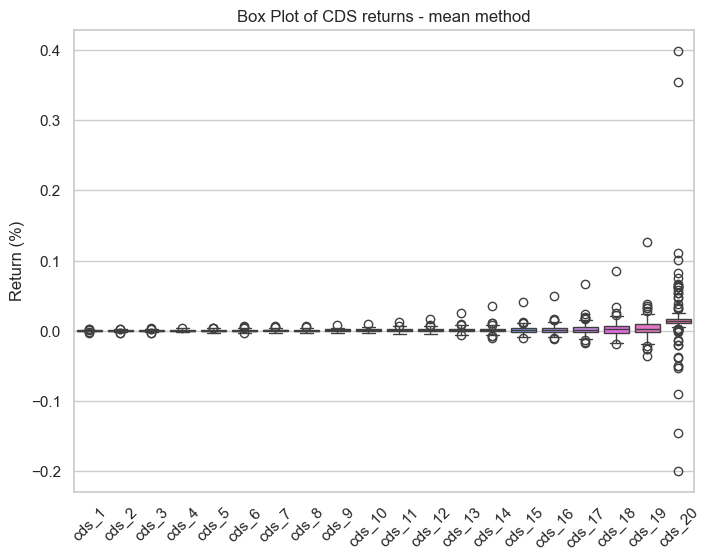

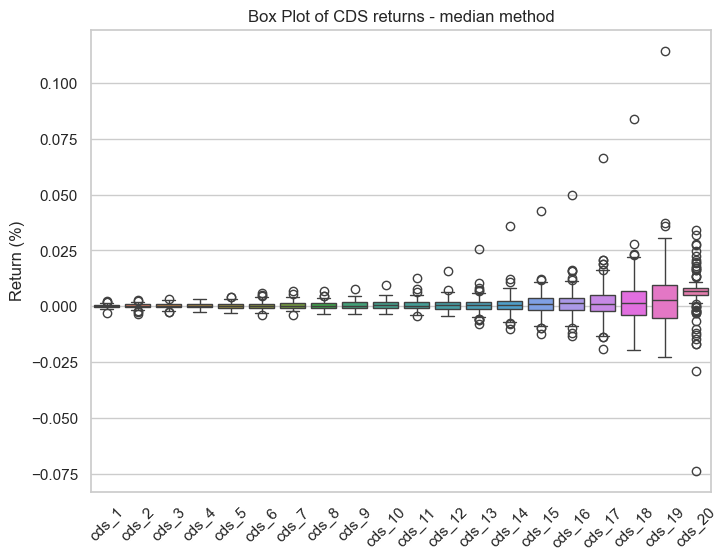

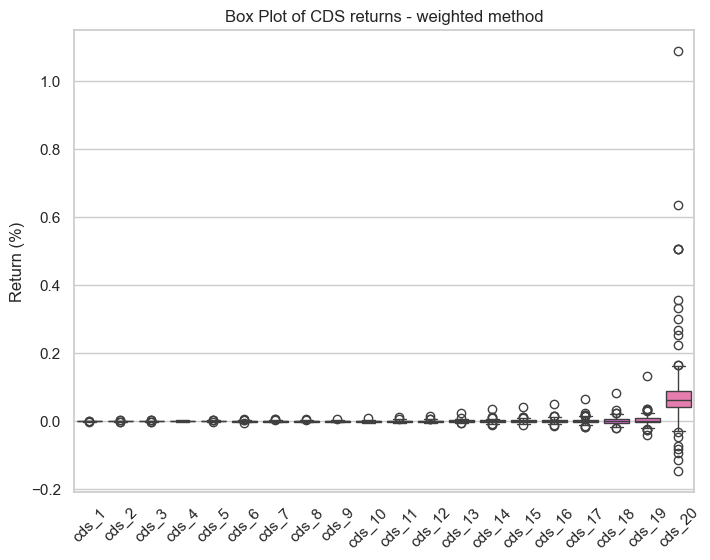

In [29]:
outsample_mean_plot = plot_cds_returns_mean(start_date2, end_date2,Method='mean')
outsample_median_plot = plot_cds_returns_median(start_date2, end_date2,Method='median')
outsample_weighted_plot = plot_cds_returns_weighted(start_date2, end_date2,Method='weighted')

In [30]:
def performance_summary(asset_return, period):
    
    return_index = 1000*(1+asset_return).cumprod() 
    previous_peaks = return_index.cummax() 
    drawdowns = (return_index - previous_peaks)/previous_peaks 
    
    recovery_date = [] 
    for col in return_index.columns: 
        prev_max = previous_peaks[col][:drawdowns[col].idxmin()].max() 
        recovery_return = pd.DataFrame([return_index[col][drawdowns[col].idxmin():]]).T
        recovery_date.append(recovery_return[recovery_return[col] >= prev_max].index.min())
    
    df = pd.DataFrame({
    'Mean': asset_return.mean() * 12,
    'Volatility': asset_return.std() * np.sqrt(12),
    'Sharpe Ratio': (asset_return.mean() * 12) / (asset_return.std() * np.sqrt(12)),
    'Skewness': asset_return.skew(),
    'Excess Kurtosis': asset_return.kurtosis(),
    'VaR (.05)' : asset_return.quantile(0.05, axis = 0),
    'Max Drawdown' : drawdowns.min(),
    'Peak' : [previous_peaks[col][:drawdowns[col].idxmin()].idxmax() for col in previous_peaks.columns],
    'Bottom' : drawdowns.idxmin(),
    })

    return df

In [31]:
performance_mean_2012 = performance_summary(returns_mean_2012, 12)
performance_median_2012 = performance_summary(returns_median_2012, 12)
performance_weighted_2012 = performance_summary(returns_weighted_2012, 12)
performance_real_2012 = performance_summary(real_returns, 12)

In [32]:
performance_mean_2024 = performance_summary(returns_mean_2024, 12)
performance_median_2024 = performance_summary(returns_median_2024, 12)
performance_weighted_2024 = performance_summary(returns_weighted_2024, 12)

In [33]:
performance_mean_2012

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (.05),Max Drawdown,Peak,Bottom
cds_1,0.002256,0.003141,0.718195,0.202180,5.444292,-0.000976,-0.007029,2009-03-31,2009-07-31
cds_2,0.003542,0.005201,0.681076,0.044375,4.494508,-0.001301,-0.012147,2008-12-31,2009-07-31
cds_3,0.004322,0.006594,0.655459,0.567886,5.174030,-0.001934,-0.015679,2008-12-31,2009-07-31
cds_4,0.005114,0.007604,0.672453,0.911181,5.175812,-0.001996,-0.016321,2008-12-31,2009-07-31
cds_5,0.005963,0.008505,0.701045,0.886135,4.137021,-0.002571,-0.018125,2008-12-31,2009-09-30
cds_6,0.006965,0.009412,0.740013,0.689048,3.841969,-0.003133,-0.019996,2009-03-31,2009-09-30
cds_7,0.007921,0.010634,0.744908,0.843322,5.138488,-0.003273,-0.023210,2009-03-31,2009-09-30
cds_8,0.008930,0.012458,0.716760,0.880109,6.880247,-0.003709,-0.029577,2009-03-31,2009-09-30
cds_9,0.010004,0.014530,0.688492,0.634160,3.931017,-0.005268,-0.035381,2009-03-31,2009-12-31
cds_10,0.011191,0.017728,0.631275,0.703479,6.129998,-0.006697,-0.044687,2009-03-31,2009-12-31


In [34]:
performance_real_2012

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (.05),Max Drawdown,Peak,Bottom
cds_1,0.013572,0.007643,1.775795,-1.035830,1.971677,-0.003000,-0.021188,2008-09-30,2011-11-30
cds_2,0.016225,0.008575,1.892268,-1.506681,6.511058,-0.002600,-0.018720,2008-08-31,2008-11-30
cds_3,0.017569,0.009436,1.861905,-1.537075,6.979306,-0.002395,-0.025018,2008-04-30,2008-12-31
cds_4,0.016496,0.011026,1.496022,-1.696289,7.059658,-0.003595,-0.028860,2008-09-30,2008-12-31
cds_5,0.019859,0.011332,1.752436,-0.600015,2.889687,-0.003495,-0.029200,2008-07-31,2008-12-31
cds_6,0.018541,0.012419,1.492913,-1.720115,7.106718,-0.003590,-0.029618,2007-12-31,2008-11-30
cds_7,0.018338,0.011952,1.534308,-0.857230,2.050296,-0.005090,-0.023926,2007-12-31,2008-11-30
cds_8,0.022124,0.013654,1.620350,-0.863867,3.022371,-0.004875,-0.027769,2008-07-31,2008-11-30
cds_9,0.020603,0.015058,1.368219,-1.656655,7.584429,-0.004790,-0.036090,2008-05-31,2008-11-30
cds_10,0.017780,0.016616,1.070050,-1.254510,4.950698,-0.008840,-0.047203,2007-10-31,2009-01-31


In [37]:
performance_difference = performance_real_2012 - performance_mean_2012
performance_difference

,Mean,Volatility,Sharpe Ratio,Skewness,Excess Kurtosis,VaR (.05),Max Drawdown,Peak,Bottom
cds_1,0.011316,0.004502,1.057600,-1.238010,-3.472615,-0.002024,-0.014159,-182 days,852 days
cds_2,0.012683,0.003374,1.211193,-1.551056,2.016549,-0.001299,-0.006573,-122 days,-243 days
cds_3,0.013247,0.002842,1.206446,-2.104961,1.805276,-0.000461,-0.009339,-245 days,-212 days
cds_4,0.011382,0.003422,0.823569,-2.607471,1.883846,-0.001599,-0.012540,-92 days,-212 days
cds_5,0.013897,0.002827,1.051390,-1.486150,-1.247334,-0.000924,-0.011075,-153 days,-273 days
cds_6,0.011576,0.003007,0.752899,-2.409163,3.264749,-0.000457,-0.009622,-456 days,-304 days
cds_7,0.010417,0.001318,0.789399,-1.700552,-3.088191,-0.001817,-0.000716,-456 days,-304 days
cds_8,0.013194,0.001195,0.903590,-1.743975,-3.857876,-0.001166,0.001808,-243 days,-304 days
cds_9,0.010599,0.000528,0.679727,-2.290816,3.653412,0.000478,-0.000708,-304 days,-396 days
cds_10,0.006589,-0.001112,0.438775,-1.957989,-1.179300,-0.002143,-0.002516,-517 days,-334 days


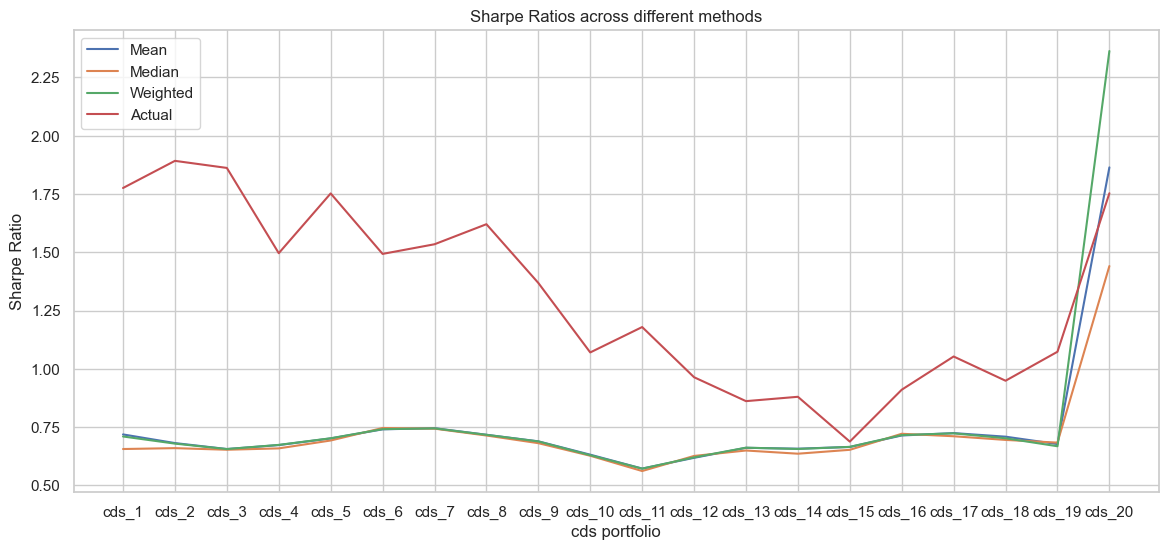

In [38]:
sharpe_ratio_mean = performance_mean_2012['Sharpe Ratio']
sharpe_ratio_median = performance_median_2012['Sharpe Ratio']
sharpe_ratio_weighted = performance_weighted_2012['Sharpe Ratio']
sharpe_ratio_real = performance_real_2012['Sharpe Ratio']

plt.figure(figsize=(14, 6))

plt.plot(sharpe_ratio_mean, label='Mean')
plt.plot(sharpe_ratio_median, label='Median')
plt.plot(sharpe_ratio_weighted, label='Weighted')
plt.plot(sharpe_ratio_real, label='Actual')

plt.title('Sharpe Ratios across different methods')
plt.xlabel('cds portfolio')
plt.ylabel('Sharpe Ratio')
plt.legend()

plt.show()